# Perceptron
## Simple 1 element example, demonstrating the learning algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def generateData(n):
    """Generate a 2D set of points and an associated decision variable,
       of length n.  The points are linearly separable by the decision variable Y.
       The line of separation is chosen to be at a random angle.  Half the points
       are on one side and half on the other.
    """
    from numpy.random import random
    
    theta = random()*np.pi
    c, s = np.cos(theta), np.sin(theta)
    # Rotation matrix to rotate points in the plane
    R = np.array([[c,-s],[s,c]])
    
    # How many in the first set to generate
    n1 = np.floor(n/2)
    
    data = np.zeros((n,3))
    y = np.zeros(n)
    
    # Generate n/2 random points in the half plane: 0 <= x1 <= 1, -1 <= x2 <= 1
    # These will have y = +1
    # then another n/2 random points in the half plane: -1 <= x1 <= 0, -1 <= x2 <= 1
    # with y = 0
    # Then rotate them by angle theta to make it more interesting
    dx = 0.01   # random values are [0,1) so we need to push them off of 0
    for i in range(n):
        if i < n1:
            pt = np.array([random()+dx,random()*2 - 1])
            y[i] = 1
        else:
            pt = np.array([-1*random()-dx,random()*2 - 1])
            y[i] = 0
        data[i,1:] = np.matmul(R,pt)
    
    # add in the x0 constant value of 1
    data[:,0] = 1
    print("theta = ",np.degrees(theta))
    print("slope = ",np.tan(theta - np.pi/2))
    
    return (y,data)

In [3]:
N = 20
Y,X = generateData(N)

theta =  112.217189211
slope =  0.408442455206


In [8]:
X

array([[ 1.        , -1.05313177, -0.06494406],
       [ 1.        , -0.54815764, -0.16757545],
       [ 1.        ,  0.79118659,  0.39948453],
       [ 1.        , -0.19791091,  0.45344932],
       [ 1.        ,  0.57857569,  0.33414826],
       [ 1.        , -0.07368925,  0.78025487],
       [ 1.        , -1.13640719,  0.50481347],
       [ 1.        , -0.04489993,  0.28138546],
       [ 1.        , -0.53147312, -0.14493146],
       [ 1.        , -0.82507995,  0.39719381],
       [ 1.        , -0.38447397, -0.43626178],
       [ 1.        ,  0.64093337, -0.73486398],
       [ 1.        , -0.51527847, -0.73521744],
       [ 1.        , -0.25405486, -0.28927026],
       [ 1.        , -0.46106532, -0.23811088],
       [ 1.        ,  0.78048173,  0.27168343],
       [ 1.        ,  0.8250911 ,  0.23157504],
       [ 1.        , -0.31125984, -0.45899902],
       [ 1.        , -0.15279288, -0.6013473 ],
       [ 1.        ,  0.97632813, -0.32204207]])

Plot the data to confirm that it is linearly separable

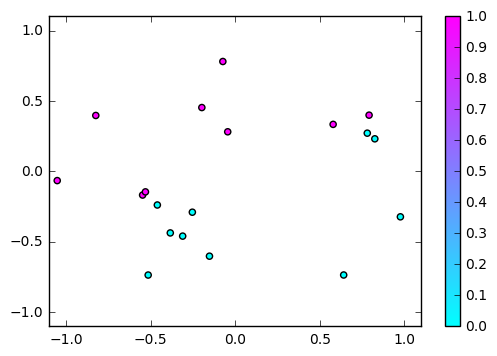

In [4]:
plt.scatter(X[:,1],X[:,2],c=Y,cmap='cool')
plt.xlim([-1.1,1.1])
plt.ylim([-1.1,1.1])
plt.colorbar()
plt.show()

## Learn the weights by gradient descent

In [5]:
# Start with random weights over -2 to 2 (size is 3)
# Could just start with all zeros
W = np.random.random(size=X.shape[1])*4 - 2
# or start with a heuristic
#W = (np.sum(X[np.where(X[:,0] == 1)],axis=0) - np.sum(X[np.where(X[:,0] == 0)],axis=0))
#W[0] = 0
print(W)

[ 1.83451558  0.52029549  1.31380437]


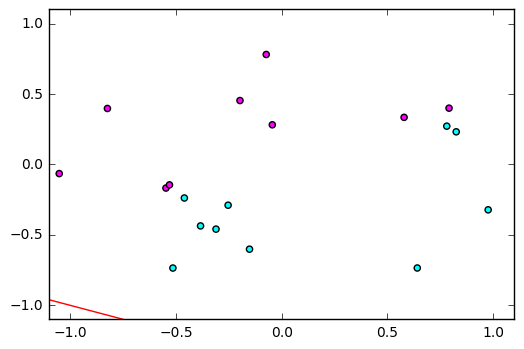

In [6]:
xplt = np.linspace(-2,2,num=50)
yplt = -W[1]/W[2]*xplt - W[0]/W[2]
plt.scatter(X[:,1],X[:,2],c=Y,cmap='cool')
plt.plot(xplt,yplt,'r-')
plt.xlim([-1.1,1.1])
plt.ylim([-1.1,1.1])
plt.show()

We have N data points.  For each one we can find out if the perceptron would fire by computing the weighted summation function and then apply the output function: $o(X_i \cdot W)$  The output function here is the step function, sometimes called the Heaviside function.

In [9]:
stepfn = np.vectorize(lambda x: 0 if x < 0 else 1)
O = stepfn(np.matmul(X,W))

Let's summarize the data and see all: [expected, computed, apply step fn, error]

In [10]:
temp = np.array([Y,np.matmul(X,W),O,Y-O]).T
print(temp)

[[ 1.          1.20125208  1.          0.        ]
 [ 1.          1.32915027  1.          0.        ]
 [ 1.          2.77101092  1.          0.        ]
 [ 1.          2.32728712  1.          0.        ]
 [ 1.          2.57455135  1.          0.        ]
 [ 1.          2.82127765  1.          0.        ]
 [ 1.          1.90647418  1.          0.        ]
 [ 1.          2.1808398   1.          0.        ]
 [ 1.          1.36758092  1.          0.        ]
 [ 1.          1.92706517  1.          0.        ]
 [ 0.          1.06131288  1.         -1.        ]
 [ 0.          1.20252281  1.         -1.        ]
 [ 0.          0.60048663  1.         -1.        ]
 [ 0.          1.32228745  1.         -1.        ]
 [ 0.          1.28179426  1.         -1.        ]
 [ 0.          2.59753558  1.         -1.        ]
 [ 0.          2.56805106  1.         -1.        ]
 [ 0.          1.06953357  1.         -1.        ]
 [ 0.          0.96496542  1.         -1.        ]
 [ 0.          1.91939442  1.  

The error function is the number of misclassified data points.  Rich and Knight call this the Perceptron criterion function, $J(\vec{w})$  Since our knowns (Y) are 0 or 1 and our outputs (O) are 0 or 1 we can compute this as follows.  Remember that it can't be larger than N and that we want it to be zero.

In [11]:
J = np.sum(np.abs(Y-O))
print(J)

10.0


Which direction should we move the decision plane (i.e. adjust the weights) to reduce this number?  In the direction of the _gradient_ of J.  Luckily the gradient is easy to compute in this case and is just the value of Y-O times X.  Where it is zero we have no X, where it is -1 we have a reduction and where it is 1 we have an addition.  It worked out to be this simple because the derivative is easy and because our chosen output values are 0 and 1.  We'd have to fudge it a bit if we had -1 and 1 or something else.

In [12]:
gradJ = (Y-O).reshape((N,1))*X
print(gradJ)

[[ 0.         -0.         -0.        ]
 [ 0.         -0.         -0.        ]
 [ 0.          0.          0.        ]
 [ 0.         -0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.         -0.          0.        ]
 [ 0.         -0.          0.        ]
 [ 0.         -0.          0.        ]
 [ 0.         -0.         -0.        ]
 [ 0.         -0.          0.        ]
 [-1.          0.38447397  0.43626178]
 [-1.         -0.64093337  0.73486398]
 [-1.          0.51527847  0.73521744]
 [-1.          0.25405486  0.28927026]
 [-1.          0.46106532  0.23811088]
 [-1.         -0.78048173 -0.27168343]
 [-1.         -0.8250911  -0.23157504]
 [-1.          0.31125984  0.45899902]
 [-1.          0.15279288  0.6013473 ]
 [-1.         -0.97632813  0.32204207]]


In [13]:
misclassified = gradJ[np.where(gradJ[:,0] != 0)]
print(misclassified)

[[-1.          0.38447397  0.43626178]
 [-1.         -0.64093337  0.73486398]
 [-1.          0.51527847  0.73521744]
 [-1.          0.25405486  0.28927026]
 [-1.          0.46106532  0.23811088]
 [-1.         -0.78048173 -0.27168343]
 [-1.         -0.8250911  -0.23157504]
 [-1.          0.31125984  0.45899902]
 [-1.          0.15279288  0.6013473 ]
 [-1.         -0.97632813  0.32204207]]


Select one that is misclassified (i.e. non zero) and move the weights in that direction by a scale factor $\eta$

In [14]:
NM = misclassified.shape[0]
x = misclassified[np.random.randint(0,NM)]

In [15]:
dW = 0.1
W = W + dW*x

In [16]:
W

array([ 1.73451558,  0.53557478,  1.3739391 ])

How much did our error change?

In [40]:
O = stepfn(np.matmul(X,W))
J = np.sum(np.abs(Y-O))
print(J)
gradJ = (Y-O).reshape((N,1))*X
misclassified = gradJ[np.where(gradJ[:,0] != 0)]
NM = misclassified.shape[0]
x = misclassified[np.random.randint(0,NM)]
dW = 0.1
W = W + dW*x

4.0


Let's run this until the error is zero

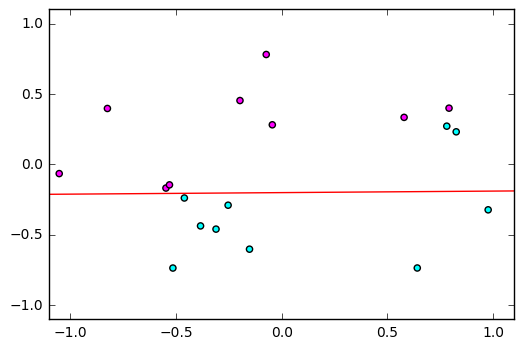

In [41]:
xplt = np.linspace(-2,2,num=50)
yplt = -W[1]/W[2]*xplt - W[0]/W[2]
plt.scatter(X[:,1],X[:,2],c=Y,cmap='cool')
plt.plot(xplt,yplt,'r-')
plt.xlim([-1.1,1.1])
plt.ylim([-1.1,1.1])
plt.show()

## And all at once

In [42]:
def plotPointsAndLine(fignum,X,Y,W):
    plt.figure(fignum)
    xplt = np.linspace(-2,2,num=50)
    yplt = -W[1]/W[2]*xplt - W[0]/W[2]
    plt.scatter(X[:,1],X[:,2],c=Y,cmap='cool')
    plt.plot(xplt,yplt,'r-')
    plt.xlabel(r'$X_1$')
    plt.ylabel(r'$X_2$')
    plt.xlim([-1.1,1.1])
    plt.ylim([-1.1,1.1])
    
stepfn = np.vectorize(lambda x: 0 if x < 0 else 1)

theta =  12.8357596499
slope =  -4.388835785
Starting W:  [-0.70332717 -0.13864694  1.15808489]
Iterations:  142
Ending W [ 0.16667283  0.5863638   0.70456045]
Ending J 0.0


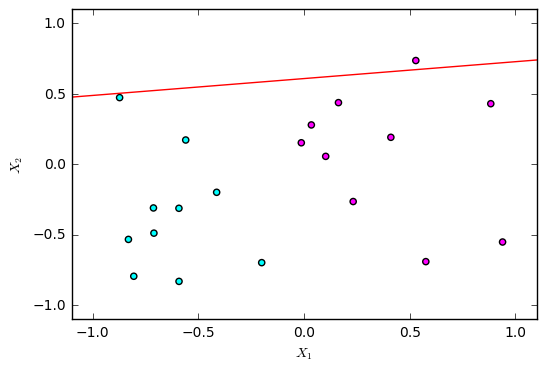

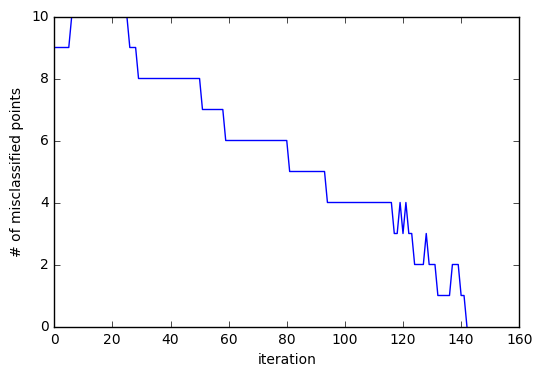

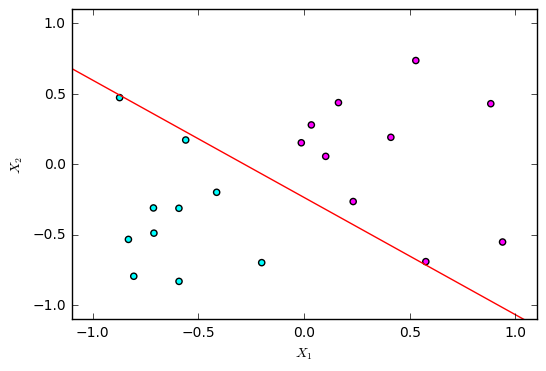

In [43]:
N = 20
Y,X = generateData(N)

#W = (np.sum(X[np.where(X[:,0] == 1)],axis=0) - np.sum(X[np.where(X[:,0] == 0)],axis=0))
#W[0] = 0
W = np.random.random(size=X.shape[1])*4 - 2
print('Starting W: ',W)

plotPointsAndLine(1,X,Y,W)

err = []
dW = 0.01
O = stepfn(np.matmul(X,W))
J = np.sum(np.abs(Y-O))
err.append(J)
count = 500
while J > 0 and count > 0:
    count = count - 1
    O = stepfn(np.matmul(X,W))
    J = np.sum(np.abs(Y-O))
    err.append(J)
    gradJ = (Y-O).reshape((N,1))*X
    misclassified = gradJ[np.where(gradJ[:,0] != 0)]
    NM = misclassified.shape[0]   # how many are misclassified
    if NM == 0:
        break
    x = misclassified[np.random.randint(0,NM)]
    W = W + dW*x

print('Iterations: ',500-count)
print('Ending W',W)
print('Ending J',J)
plt.figure(2)
plt.plot(err)
plt.xlabel('iteration')
plt.ylabel('# of misclassified points')

plotPointsAndLine(3,X,Y,W)

plt.show()
